# Dimension Reduction


The notebook is to facilitate discussion on dimension reduction.



---



## Part I: Principal Components 

In [1]:
# Import necessary libraries
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

#### Retrieve Data

FRED-MD: A Monthly Database for Macroeconomic Research 
See McCracken & Ng (2016).

In [2]:
# Define the FRED path and local file path for the data
fred_path = "https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv"
local_file_path = Path("data/current.csv")

# Load data from the local file if it exists; otherwise, load from FRED
if local_file_path.is_file():
    print("Local file found")
    df = pd.read_csv('data/current.csv')
else:
    print("Be patient: loading from FRED (2 minutes)")
    df = pd.read_csv(fred_path)
    print("Done")
    
df.drop(0, inplace=True)

# Set the index to the date column and convert to datetime
df = df.set_index("sasdate", drop=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Preview the first few rows of the DataFrame
df.head()

Be patient: loading from FRED (2 minutes)
Done


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


#### Standardize the Data

In [3]:
df.dropna(inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.dropna(inplace=True)

# Preview the first few rows of the DataFrame
df_scaled.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-02-01,-1.649841,-1.741182,-1.757197,-2.072269,-1.497340,-2.631503,-2.877875,-2.849244,-3.013364,-2.718775,...,-1.461498,-1.544300,-1.510596,-1.452856,-1.559079,-1.284516,-1.532245,-1.956606,-1.176170,-0.344214
1992-03-01,-1.645971,-1.739401,-1.752427,-2.058729,-1.500875,-2.585475,-2.812383,-2.784736,-2.903008,-2.626461,...,-1.450123,-1.536423,-1.504421,-1.437050,-1.554180,-0.745878,-1.541449,-1.951708,-1.172262,-0.446060
1992-04-01,-1.636481,-1.731612,-1.750254,-2.036220,-1.493775,-2.543112,-2.753543,-2.729208,-2.785988,-2.540761,...,-1.448338,-1.526410,-1.496188,-1.435293,-1.544382,-0.656106,-1.530412,-1.951605,-1.167576,-0.450268
1992-05-01,-1.622696,-1.715373,-1.736739,-2.065803,-1.487285,-2.524837,-2.709563,-2.685396,-2.703275,-2.393567,...,-1.442254,-1.523259,-1.494129,-1.435293,-1.537034,-0.506484,-1.548132,-1.951332,-1.160608,-0.629957
1992-06-01,-1.611834,-1.702198,-1.729637,-2.030271,-1.483944,-2.521693,-2.729276,-2.708948,-2.765456,-2.460383,...,-1.421753,-1.519397,-1.485896,-1.415975,-1.532135,-0.416711,-1.541200,-1.943767,-1.154054,-0.626869


#### Estimating the Principal Components

In [11]:
pca = PCA(n_components=10, whiten=True, svd_solver='full', random_state=42)
pca.fit(df_scaled)

PCA(n_components=10, random_state=42, svd_solver='full', whiten=True)

#### Selecting the Number of Components

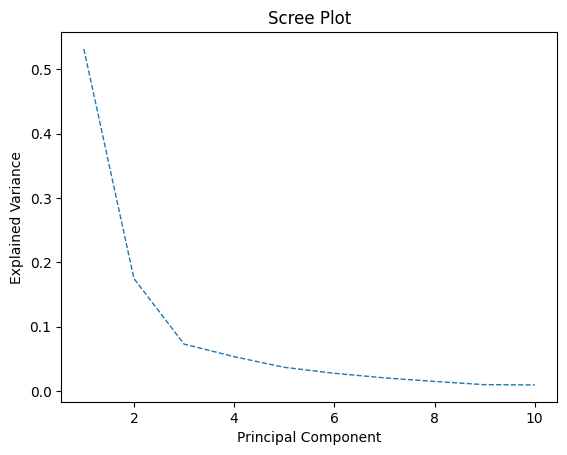

In [12]:
plt.figure()
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_, '--', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

plt.show()

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Decide on the number of components (e.g., explaining 75% variance)
n_components = np.argmax(cumulative_variance >= 0.75) + 1
print(f'Number of components explaining 75% of the variance: {n_components}')

Number of components explaining 75% of the variance: 3


#### Estimated Components

In [14]:
pca_indices = pd.DataFrame(pca.transform(df_scaled), index=df_scaled.index)
pca_indices

,0,1,2,3,4,5,6,7,8,9
sasdate,,,,,,,,,,
1992-02-01,1.794930,1.067426,-1.576575,0.198366,0.741361,0.421944,-0.542046,0.848327,-0.596060,2.601429
1992-03-01,1.787913,1.068038,-1.727188,0.397786,0.458145,1.049671,0.147413,0.905253,-0.635208,1.809554
1992-04-01,1.750361,1.160521,-1.678621,0.198299,0.378734,0.863148,0.278147,0.768211,-0.503243,1.696239
1992-05-01,1.761309,1.099299,-1.511910,0.099027,0.392761,0.509449,-0.364725,0.489852,-0.597844,2.183328
1992-06-01,1.751557,1.192170,-1.531505,0.103413,0.467636,0.679501,-0.338301,0.642487,-0.624035,1.880282
...,...,...,...,...,...,...,...,...,...,...
2023-12-01,-1.604477,-1.559109,-1.395026,-0.570125,2.096855,0.550517,-0.827646,-0.744867,-1.740958,1.280219
2024-01-01,-1.592527,-1.499120,-1.386217,-0.528353,2.362402,0.237292,-0.742180,-0.679605,-2.142163,1.504399
2024-02-01,-1.588547,-1.616538,-1.395770,-0.415643,2.006652,0.433106,-0.871649,-0.883942,-1.706282,1.597048


#### Estimated Loadings -- Interpretation

In [26]:
pca_loadings = pd.DataFrame(pca.components_.T, index=df_scaled.columns.values)
pca_loadings

,0,1,2,3,4,5,6,7,8,9
RPI,-0.118943,-0.024607,-0.030089,0.033920,0.017696,-0.040954,-0.023292,0.033550,0.010711,-0.042220
W875RX1,-0.119170,-0.035817,-0.017423,0.025669,0.013670,-0.038367,0.004984,0.028519,-0.003541,-0.023451
DPCERA3M086SBEA,-0.120736,-0.023855,-0.012866,0.024432,0.013022,-0.007626,0.008218,0.016053,-0.038362,-0.013465
CMRMTSPLx,-0.118168,-0.047962,0.019091,0.015696,-0.014418,-0.026818,0.001305,0.022836,0.001695,-0.030323
RETAILx,-0.116649,-0.041317,-0.063344,0.020631,0.027589,0.028230,-0.026910,-0.015687,-0.008381,0.010234
...,...,...,...,...,...,...,...,...,...,...
UMCSENTx,0.053912,-0.095872,0.034132,-0.033706,-0.197031,-0.257819,0.055110,0.061268,-0.130858,-0.189428
DTCOLNVHFNM,-0.116862,-0.028548,0.002537,0.041675,0.016965,0.075966,-0.033052,-0.014213,-0.027118,0.088783
DTCTHFNM,-0.110866,0.008063,0.114200,0.007884,0.017795,0.079681,0.015774,0.005174,0.014072,0.090767
INVEST,-0.113284,-0.026742,-0.098270,0.041142,0.024078,0.031296,-0.055525,-0.012978,0.028129,-0.007641


Things to consider:
* Suggested data transformation `TCODE' should be applied for each series before fitting the model.
* Train-Test split to determine the stability of the PCs.
* Interpretability - Plot loading vectors, Sparse PCA, etc.



---



## PART II:  Forecasting - OLS, LASSO, PCA

#### Retrieve the data

In [27]:
# Define the FRED path and local file path for the data
fred_path = "https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv"
local_file_path = Path("data/current.csv")

# Load data from the local file if it exists; otherwise, load from FRED
if local_file_path.is_file():
    print("Local file found")
    df = pd.read_csv('data/current.csv')
else:
    print("Be patient: loading from FRED (2 minutes)")
    df = pd.read_csv(fred_path)
    print("Done")
    
df.drop(0, inplace=True)

# Set the index to the date column and convert to datetime
df = df.set_index("sasdate", drop=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Preview the first few rows of the DataFrame
df.head()

Be patient: loading from FRED (2 minutes)
Done


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


#### Define the Target Variable (S&P 500 Returns)

In [28]:
df['Target'] = (np.log(df['S&P 500']) - np.log(df['S&P 500'].shift(1))).shift(1)
df.drop('S&P 500', axis=1, inplace=True)
df.dropna(inplace=True)
df

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Target
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-02-01,8444.994,7290.1,49.123,718889.123,164213.0,61.9192,70.4258,68.6473,80.2867,57.8121,...,52.129,11.89,13.67,11.30,68.8,64066.00,189752.08,744.1547,17.0505,0.068559
1992-03-01,8457.388,7294.4,49.213,721782.597,163721.0,62.4403,71.0155,69.2529,81.0021,58.9931,...,52.284,11.92,13.76,11.32,76.0,62992.00,190887.95,749.5423,16.2227,-0.008496
1992-04-01,8487.783,7313.2,49.254,726592.639,164709.0,62.9199,71.5453,69.7742,81.7607,60.0895,...,52.481,11.96,13.77,11.36,77.2,64280.00,190911.80,756.0018,16.1885,-0.012684
1992-05-01,8531.932,7352.4,49.509,720270.973,165612.0,63.1268,71.9413,70.1855,82.2969,61.9726,...,52.543,11.97,13.77,11.39,79.2,62212.00,190975.14,765.6078,14.7280,0.000123
1992-06-01,8566.719,7384.2,49.643,727863.941,166077.0,63.1624,71.7638,69.9644,81.8938,61.1178,...,52.619,12.01,13.88,11.41,80.4,63021.00,192729.46,774.6433,14.7531,0.018001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,19194.730,15823.3,117.796,1523993.000,703256.0,102.6309,100.6803,100.8413,101.9747,107.7707,...,124.912,30.42,34.98,27.13,69.7,521938.91,921959.34,5092.0731,12.6960,0.043689
2024-01-01,19316.845,15862.4,117.385,1504491.000,695631.0,101.4830,99.9017,100.0648,101.2513,103.9426,...,125.804,30.57,35.30,27.21,79.0,525706.15,922805.11,5112.6320,13.3453,0.049214
2024-02-01,19307.749,15834.0,117.664,1509152.000,700519.0,102.6045,100.8232,100.7468,101.6808,107.5455,...,126.118,30.67,35.23,27.35,76.9,529015.93,921985.58,5112.3690,13.8808,0.027486


#### Creating training and test sets, standardizing the data

In [29]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [30]:
scaler = StandardScaler()
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data), index=train_data.index, columns=train_data.columns)
test_data_scaled = pd.DataFrame(scaler.transform(test_data), index=test_data.index, columns=test_data.columns)

#### Estimate the PCA model

In [31]:
# Initialize PCA
pca = PCA(n_components=3, whiten=True, svd_solver='full')

# Fit PCA on the training data
pca.fit(train_data_scaled.drop("Target", axis=1))

# Transform both train and test sets
train_pca = pd.DataFrame(pca.transform(train_data_scaled.drop("Target", axis=1)), index=train_data_scaled.index)
test_pca = pd.DataFrame(pca.transform(test_data_scaled.drop("Target", axis=1)), index=test_data_scaled.index)

#### Forecasting Models

In [32]:
ols = LinearRegression(fit_intercept=True).fit(train_data_scaled.drop("Target", axis=1), train_data_scaled["Target"])
ols_pca = LinearRegression(fit_intercept=True).fit(train_pca, train_data_scaled["Target"])
lasso = Lasso(alpha=0.005, fit_intercept=True).fit(train_data_scaled.drop("Target", axis=1), train_data_scaled['Target'])

In [33]:
ols_forecasts = ols.predict(test_data_scaled.drop("Target", axis=1))
ols_pca_forecasts = ols_pca.predict(test_pca)
lasso_forecasts = lasso.predict(test_data_scaled.drop("Target", axis=1))

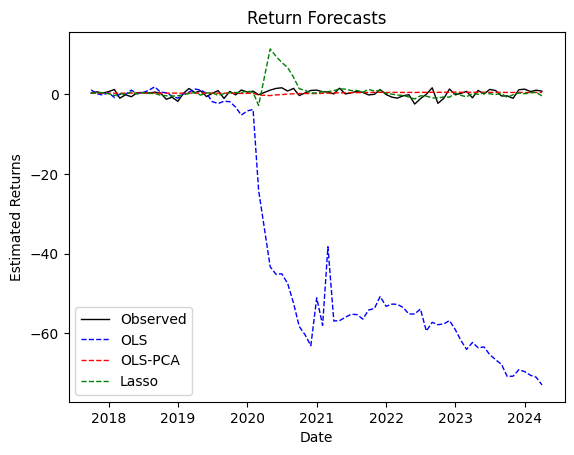

In [34]:
plt.figure()
plt.plot(test_data_scaled.index, test_data_scaled["Target"], linewidth=1, color='black', label='Observed')
plt.plot(test_data_scaled.index, ols_forecasts, '--', linewidth=1, color='blue', label='OLS')
plt.plot(test_data_scaled.index, ols_pca_forecasts, '--', linewidth=1, color='red', label='OLS-PCA')
plt.plot(test_data_scaled.index, lasso_forecasts, '--', linewidth=1, color='green', label='Lasso')
plt.title('Return Forecasts')
plt.xlabel('Date')
plt.ylabel('Estimated Returns')
plt.legend()

plt.show()

In [35]:
for i in [ols_forecasts, ols_pca_forecasts, lasso_forecasts]:
    print("MS and MA Errors:    ", mean_squared_error(test_data_scaled["Target"].values, i), "   ", mean_absolute_error(test_data_scaled["Target"].values, i))


MS and MA Errors:     2141.6335386848027     36.75921410700193
MS and MA Errors:     0.8829806302677258     0.7284722733842028
MS and MA Errors:     4.0364389971730565     1.1065810592276297


Things to consider:

* Suggested data transformation `TCODE' should be applied for each series before fitting the model.
* Expanding window / rolling window regressions to re-estimate the models on recent data. How many observations should the initial window contain? 
* Split the training data into training and validation subsets, to tune the Lasso lambda hyperparameter. What validation methodology should be used: simple holdout, cross-validation, etc.? What should the training-validation split be?
* Selection of optimal PCs in expanding window / rolling window regressions.
* etc.


## PART III: K-Means Clustering

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

#### Retrieve the Data

In [37]:
# Define the FRED path and local file path for the data
fred_path = "https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv"
local_file_path = Path("data/current.csv")

# Load data from the local file if it exists; otherwise, load from FRED
if local_file_path.is_file():
    print("Local file found")
    df = pd.read_csv('data/current.csv')
else:
    print("Be patient: loading from FRED (2 minutes)")
    df = pd.read_csv(fred_path)
    print("Done")
    
df.drop(0, inplace=True)

# Set the index to the date column and convert to datetime
df = df.set_index("sasdate", drop=True)
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Preview the first few rows of the DataFrame
df.head()

Be patient: loading from FRED (2 minutes)
Done


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5476,24.3911,23.1161,32.5567,19.9445,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


#### Standardize the Data

In [38]:
df.dropna(inplace=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.dropna(inplace=True)

# Preview the first few rows of the DataFrame
df_scaled.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-02-01,-1.649841,-1.741182,-1.757197,-2.072269,-1.497340,-2.631503,-2.877875,-2.849244,-3.013364,-2.718775,...,-1.461498,-1.544300,-1.510596,-1.452856,-1.559079,-1.284516,-1.532245,-1.956606,-1.176170,-0.344214
1992-03-01,-1.645971,-1.739401,-1.752427,-2.058729,-1.500875,-2.585475,-2.812383,-2.784736,-2.903008,-2.626461,...,-1.450123,-1.536423,-1.504421,-1.437050,-1.554180,-0.745878,-1.541449,-1.951708,-1.172262,-0.446060
1992-04-01,-1.636481,-1.731612,-1.750254,-2.036220,-1.493775,-2.543112,-2.753543,-2.729208,-2.785988,-2.540761,...,-1.448338,-1.526410,-1.496188,-1.435293,-1.544382,-0.656106,-1.530412,-1.951605,-1.167576,-0.450268
1992-05-01,-1.622696,-1.715373,-1.736739,-2.065803,-1.487285,-2.524837,-2.709563,-2.685396,-2.703275,-2.393567,...,-1.442254,-1.523259,-1.494129,-1.435293,-1.537034,-0.506484,-1.548132,-1.951332,-1.160608,-0.629957
1992-06-01,-1.611834,-1.702198,-1.729637,-2.030271,-1.483944,-2.521693,-2.729276,-2.708948,-2.765456,-2.460383,...,-1.421753,-1.519397,-1.485896,-1.415975,-1.532135,-0.416711,-1.541200,-1.943767,-1.154054,-0.626869


#### K-Means Clustering

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)  # You can choose a different number of clusters
clusters = kmeans.fit_predict(df_scaled)

/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-1.41836105 -1.4839108  -1.48002358 -1.58443916 -1.253247   -1.85092104
  -1.86275085 -1.89670518 -1.65456894 -1.57422348 -1.32689602 -1.7921221
  -1.71856855 -1.80628078  0.25128507 -1.89626553 -1.54139849 -1.40320758
   1.16886424 -0.60225933 -0.46965647 -1.61382778 -1.55935891  0.22542886
  -0.62874254  0.75002198  0.00847027 -0.38674857 -0.19416507 -0.42391196
  -0.03628581 -1.57646722  0.78166752 -0.44604138 -1.44094787  1.35080285
   1.1592928   1.57719165 -1.59344097 -1.50928635 -1.45576306 -1.716851
  -1.6417871  -1.77603616  0.24527279  0.85324559  0.16153221  0.09055379
   0.03022016  0.72340459 -0.21126249  0.06023673 -0.15013811 -0.1420558
   0.6118007  -0.48162395 -0.11639539 -1.34118634 -1.35352073 -1.23086178
  -1.16735716 -1.20316481  1.34549119 -0.50176457 -1.04411224 -1.1004163
  -0.93255253 -0.8398219  -0.8174442  -1.12702636 -1.39015925 -1.20648426
  -1.44637841 -1.00711386  1.21390081 -0.37377838  0.92065087  0.9428251
   0.9580099   0.97930519  

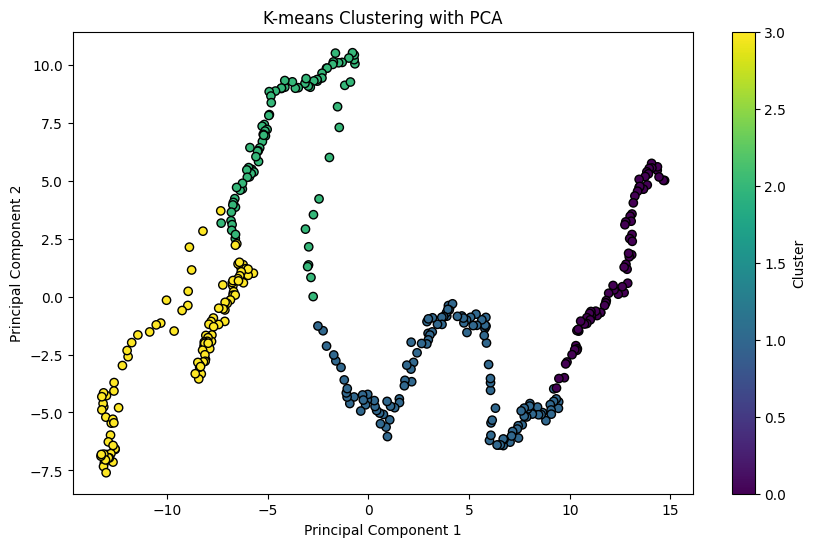

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/justincase/PycharmProjects/UoA_781/venv/lib/python3.8/site-packages/skle

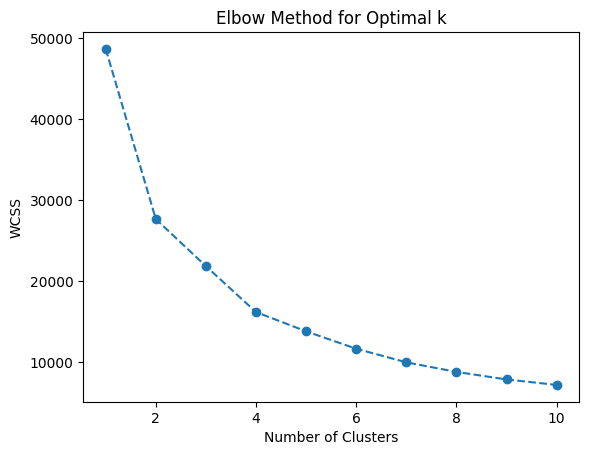

In [42]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Things to consider:

* Suggested data transformation `TCODE' should be applied for each series before fitting the model.
* How do the clusters map back to the 8 categories identified in FRED-MD?